In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


df_titanic = pd.read_csv("./titanic.csv")
df_titanic.dropna(inplace=True)
df_titanic
df_yes=df_titanic.loc[df_titanic.alive=="yes"]

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

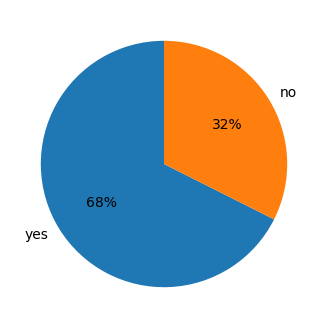

In [14]:
#1
datos=df_titanic.alive.value_counts(True)

fig,ax = plt.subplots(1,1,figsize = (4,4))
ax.pie(datos.values,
        labels=datos.index,
        autopct='%.0f%%', startangle= 90);


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


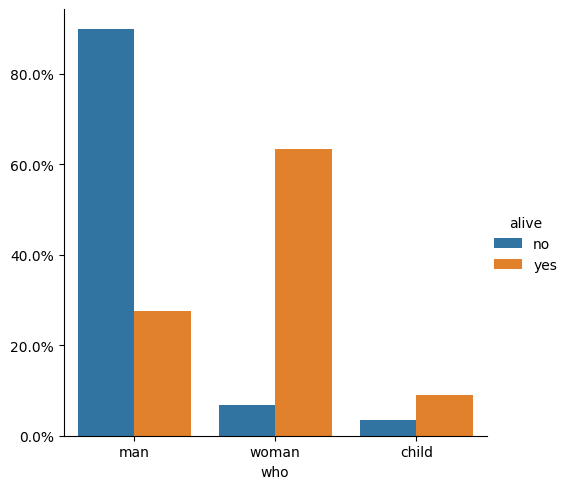

In [40]:
# "Las mujeres y los niños primero"
cat_colx="who"
cat_coly="alive"
frecuencias_absolutas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts()
frecuencias_relativas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts(True)
frecuencias_relativas["proportion"] *= 100
sns.catplot(x="who",
            y = "proportion",
            
            hue = "alive",
            kind="bar", 
            edgecolor=".6",
            data=frecuencias_relativas)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x}%'))
ax.set_ylabel('');

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


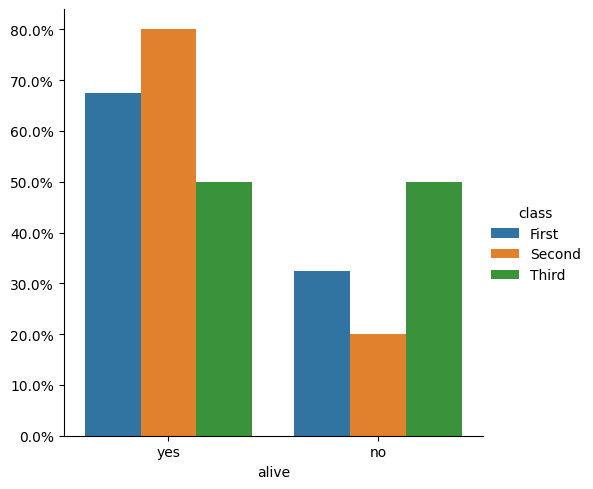

In [37]:
# "la clase también tuvo su peso"
cat_colx="alive"
cat_coly="class"
frecuencias_absolutas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts()
frecuencias_relativas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts(True)
frecuencias_relativas["proportion"] *= 100
sns.catplot(x="alive",
            y = "proportion",
            
            hue = "class",
            kind="bar", 
            edgecolor=".6",
            data=frecuencias_relativas)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x}%'))
ax.set_ylabel('');

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


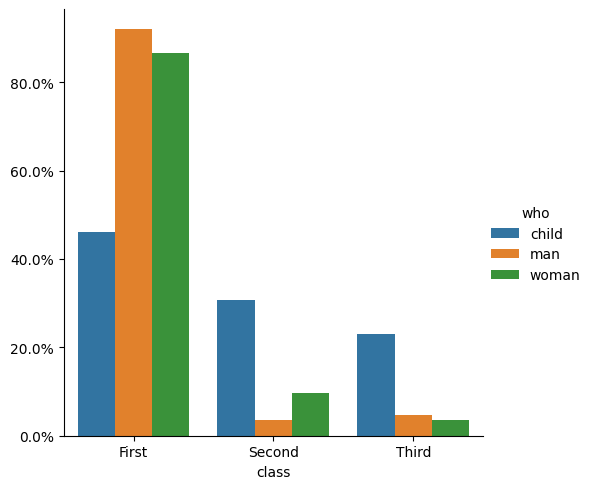

In [39]:
# "personas y clases"
cat_colx="class"
cat_coly="who"
frecuencias_absolutas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts()
frecuencias_relativas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts(True)
frecuencias_relativas["proportion"] *= 100
sns.catplot(x="class",
            y = "proportion",
            
            hue = "who",
            kind="bar", 
            edgecolor=".6",
            data=frecuencias_relativas)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x}%'))
ax.set_ylabel('');

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


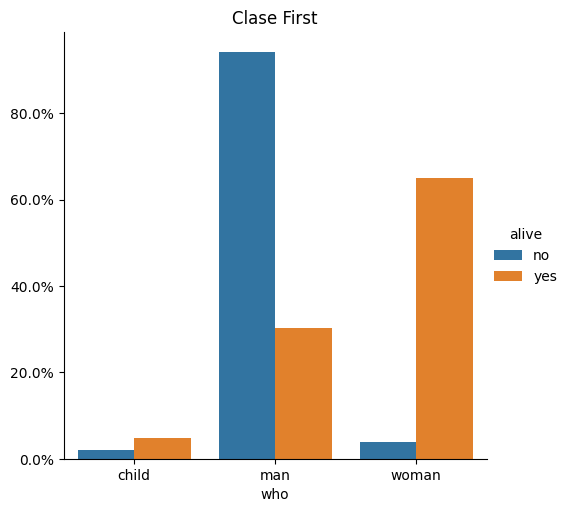

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


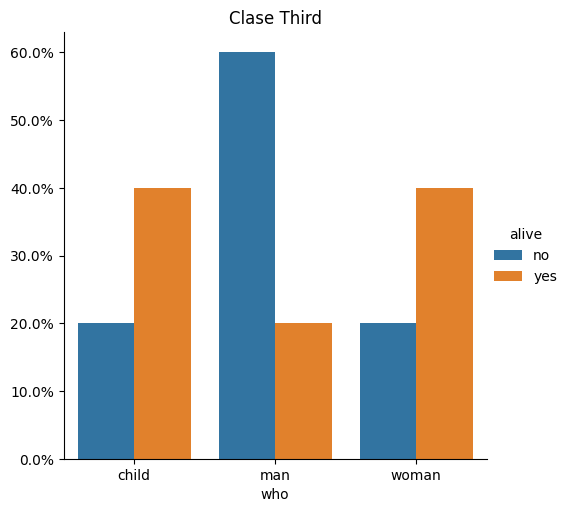

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


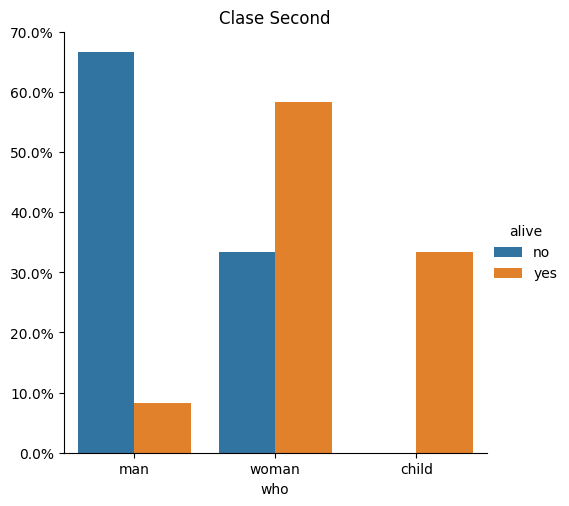

In [41]:
# "personas y clases 2"
for class_value in df_titanic['class'].unique():
    df_filtered = df_titanic[df_titanic['class'] == class_value]
    frecuencias_relativas = df_filtered.groupby([cat_coly, cat_colx], as_index=False).size()
    frecuencias_relativas["proportion"] = (frecuencias_relativas['size'] / frecuencias_relativas.groupby(cat_coly)['size'].transform('sum')) * 100
    g = sns.catplot(x="who",
                    y="proportion",
                    hue="alive",
                    kind="bar",
                    edgecolor=".6",
                    data=frecuencias_relativas)
    
    ax = g.ax
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x}%'))
    ax.set_ylabel('')
    ax.set_title(f'Clase {class_value}')

    plt.show()

<Axes: xlabel='embark_town', ylabel='count'>

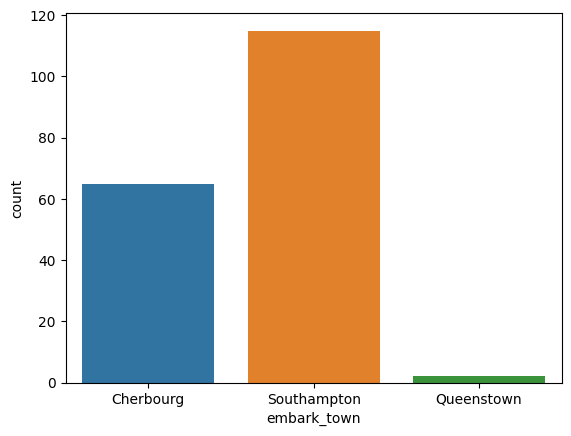

In [64]:
#puerto de embarque
sns.countplot(x="embark_town",data=df_titanic,hue="embark_town")

   embark_town alive  count
0    Cherbourg   yes     48
1    Cherbourg    no     17
2   Queenstown    no      1
3   Queenstown   yes      1
4  Southampton   yes     74
5  Southampton    no     41
   embark_town alive  proportion
0    Cherbourg   yes    0.738462
1    Cherbourg    no    0.261538
2   Queenstown    no    0.500000
3   Queenstown   yes    0.500000
4  Southampton   yes    0.643478
5  Southampton    no    0.356522


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


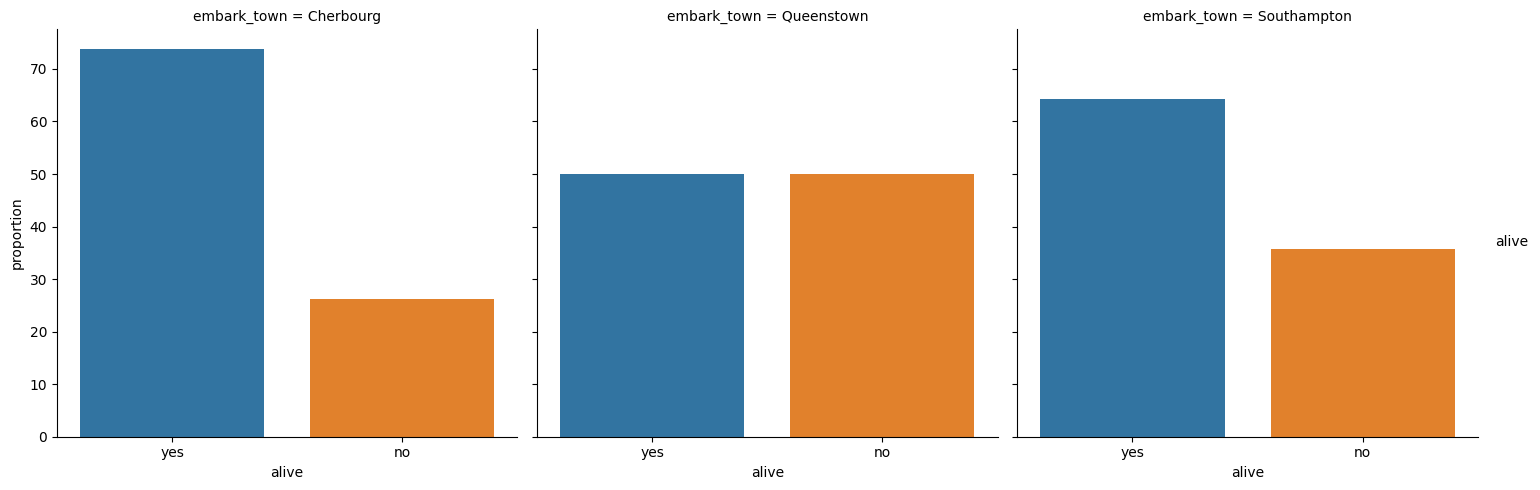

In [69]:
cat_colx="alive"
cat_coly="embark_town"
frecuencias_absolutas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts()
frecuencias_relativas=df_titanic.groupby(cat_coly, as_index=False)[cat_colx].value_counts(True)
frecuencias_relativas["proportion"] *= 100
sns.catplot(x="alive",
            y = "proportion",
            col="embark_town",
            hue = "alive",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

In [74]:
df_cher=df_titanic.loc[df_titanic["embark_town"]=="Cherbourg"]

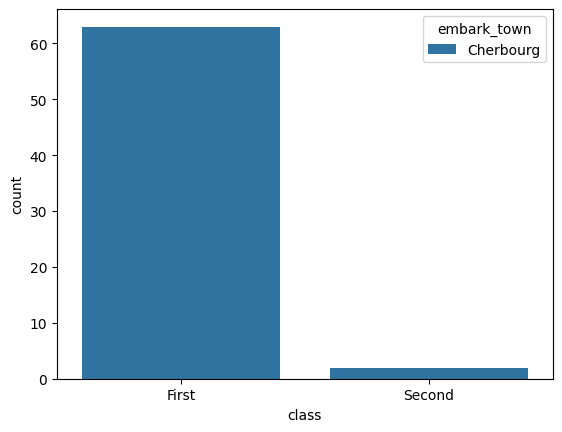

In [77]:
sns.countplot(x="class",data=df_cher,hue="embark_town")
